<a href="https://colab.research.google.com/github/nmeena2/astro_assignments/blob/main/414_HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from astropy.io import fits
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
dec = fits.getdata('/content/gdrive/MyDrive/DECam_00380036_09.fits')
bias = fits.getdata('/content/gdrive/MyDrive/D_n20131112t1127_c13_r1472p01_biascor.fits')
flat = fits.getdata('/content/gdrive/MyDrive/D_n20131112t1127_r_c13_r1472p01_dflatcor.fits')


In [ ]:
with fits.open('/content/gdrive/MyDrive/DECam_00380036_09.fits') as hdul:
  hdul.info()
  hdr = hdul[0].header
  print("TRIMSEC", hdr['TRIMSEC'])
hdul.close()
print("\n\n")

with fits.open('/content/gdrive/MyDrive/D_n20131112t1127_c13_r1472p01_biascor.fits') as hdul:
  hdul.info()
  hdr = hdul[0].header
hdul.close()
print("\n\n")

with fits.open('/content/gdrive/MyDrive/D_n20131112t1127_r_c13_r1472p01_dflatcor.fits') as hdul:
  hdul.info()
  hdr = hdul[0].header
hdul.close()




Filename: /content/gdrive/MyDrive/DECam_00380036_09.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  S14           1 PrimaryHDU     103   (2160, 4146)   int16 (rescales to uint16)   
TRIMSEC [57:2104,51:4146]



Filename: /content/gdrive/MyDrive/D_n20131112t1127_c13_r1472p01_biascor.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     168   (2048, 4096)   float32   
  1                1 ImageHDU         8   (2048, 4096)   float32   



Filename: /content/gdrive/MyDrive/D_n20131112t1127_r_c13_r1472p01_dflatcor.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     139   (2048, 4096)   float32   
  1                1 ImageHDU         8   (2048, 4096)   float32   


1709.0 2083.0


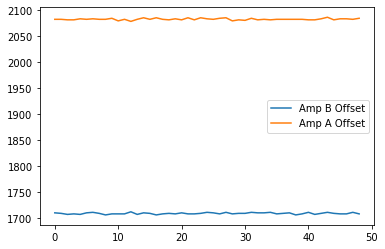

In [ ]:
x = 7
plt.plot(dec[x, 6:55])
plt.plot(dec[x, 1087:1136])

plt.legend(["Amp B Offset", "Amp A Offset"])

amp1 = np.median(dec[x,6:55])
amp2 = np.median(dec[x,1087:1136])
print(amp1, amp2)

plt.savefig("Hw9_Fig1.png", format = 'png', dpi = 600)

Text(0.5, 1.0, 'Removed Flat')

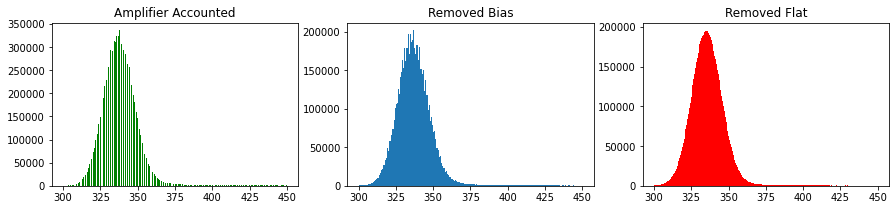

In [ ]:
c1 = 300
c2 = 450

x1 = 51
x2 = 4146

y1 = 57
y2 = 2104

norm_data = np.concatenate((dec[:,:1080]-amp1, dec[:,1080:]-amp2), 1)

crop_data = norm_data[x1-1:x2, y1 - 2:y2-1]

bias_crop = crop_data - bias
flat_tick = (bias_crop)/(flat)
image = flat_tick

plt.figure(figsize = (15, 3))
plt.subplot(1, 3, 1)
plt.hist(crop_data.ravel(), bins = 256, range = (c1, c2), color = 'g')
plt.title("Amplifier Accounted")

plt.subplot(1, 3, 2)
plt.hist(bias_crop.ravel(), bins = 256, range = (c1, c2), )
plt.title("Removed Bias")

plt.subplot(1, 3, 3)
plt.hist(flat_tick.ravel(), bins = 256, range = (c1, c2), color = 'r')
plt.title("Removed Flat")

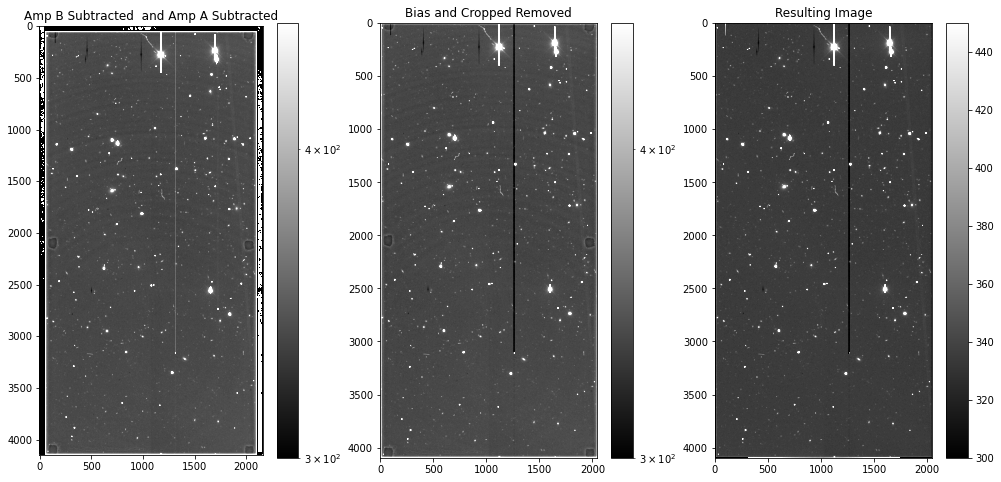

In [ ]:
plt.figure(figsize = (17, 8))

plt.subplot(1, 3, 1)
plt.imshow(norm_data, cmap = 'gray', norm = LogNorm(vmin = c1, vmax = c2))
plt.title("Amp B Subtracted  and Amp A Subtracted")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(bias_crop, cmap = 'gray', norm = LogNorm(vmin = c1, vmax = c2))
plt.title("Bias and Cropped Removed")
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(flat_tick, cmap = 'gray')
plt.clim(c1, c2)
plt.title("Resulting Image")
plt.colorbar()



OSError: ignored

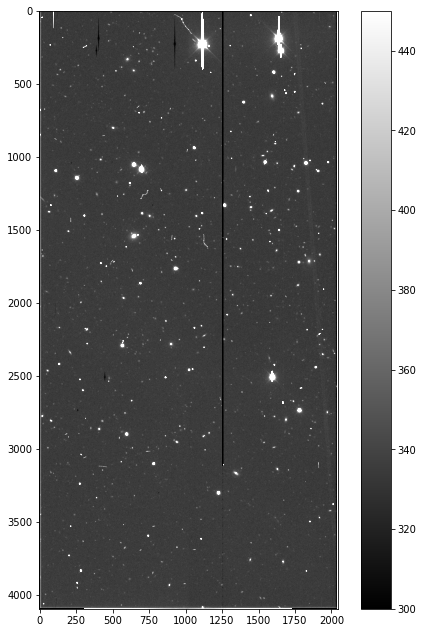

In [ ]:
plt.figure(figsize = (8, 11))
plt.imshow(image, cmap = 'gray')
plt.clim(c1, c2)
plt.colorbar()

hdu = fits.open('/content/gdrive/MyDrive/DECam_00380036_09.fits')
hdux = fits.PrimaryHDU(flat_tick, hdul[0].header)
hdux.writeto('Reduced_Image.fits')